## Multivariable or Multiple Linear Regression

We may extend linear regression to allow our models to consider more predictors. A natural first approach is to assume additive effects, basically extending our line to a plane, or generalized version of a $d$-dimensional plane as we add more predictors.
* Model selection - which predictors to include

The general linear model extends the simple linear regression by adding terms linearly into the model.
$$Y_i =  \beta_1 X_{1i} + \beta_2 X_{2i} + \ldots +
\beta_{p} X_{pi} + \epsilon_{i} 
= \sum_{k=1}^p X_{ik} \beta_j + \epsilon_{i},$$
where $X_{1i}=1$ typically, so that an intercept is also included.

Least squares minimizes
$$\sum_{i=1}^n \left(Y_i - \sum_{k=1}^p X_{ki} \beta_j\right)^2$$.

Note that the linearity refers to the coefficients and not to the predictors. Therefore also 
$$Y_i =  \beta_1 X_{1i}^2 + \beta_2 X_{2i}^2 + \ldots +
\beta_{p} X_{pi}^2 + \epsilon_{i} $$ is still a linear model.

Let's see a concrete example:
We will cosider the sales of products and their advertising budget in different media (TV, radio, newspaper):

In [68]:
import csv
import requests 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
sns.set_palette("GnBu_d")
import warnings
warnings.filterwarnings('ignore')



In [23]:
df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
X = df_adv[['TV', 'Radio']]
y = df_adv['Sales']
df_adv.head()



,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
*  TV: advertising dollars spent on TV for a single product in a given market 
*    Radio: advertising dollars spent on Radio
*    Newspaper: advertising dollars spent on Newspaper

What is the **response**?

 *   Sales: sales of a single product in a given market 



In [22]:
print(df_adv.shape)

(200, 4)


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


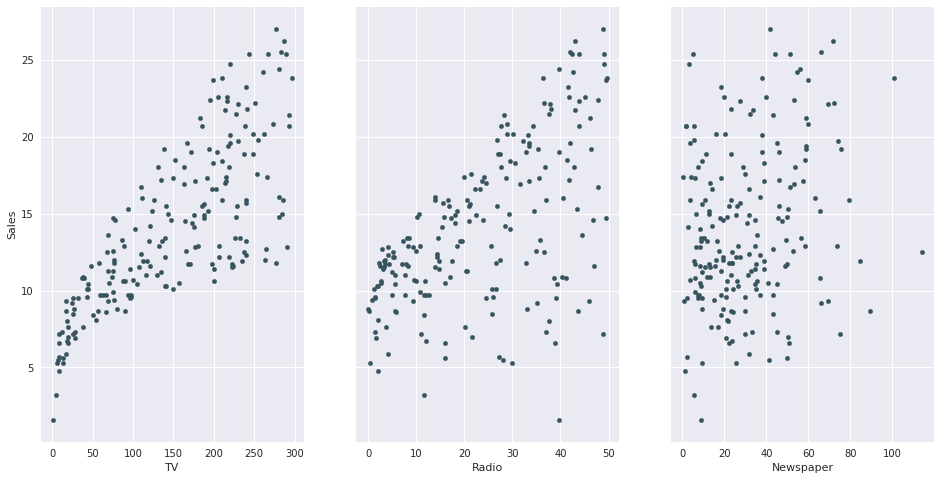

In [20]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df_adv.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
df_adv.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
df_adv.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

The multiple regression model desribes the response as a weighted sum of the predictors:
$$Sales = \beta_0 + \beta_1 \cdot \text{TV} + \beta_2 \cdot \text{Radio} $$

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


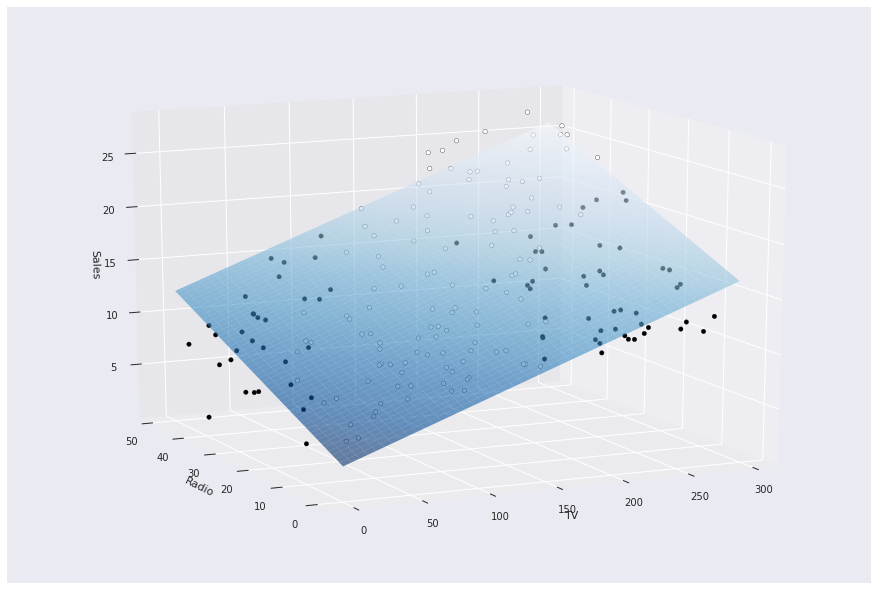

In [10]:
X = df_adv[['TV', 'Radio']]
y = df_adv['Sales']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot 
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), 
                       np.linspace(X.Radio.min(), X.Radio.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.Blues_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].TV, X[resid >= 0].Radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].TV, X[resid < 0].Radio, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

### How do we obtain the coefficients?
Assuming for the sake of simplicity a multivariable regression with 2 regressors that passes through the origin, we would like to minimise $$\sum_{i=1}^n \left( Y_i - X_{1i} \beta_1 -X_{2i} \beta_2  \right)^2$$.
Imagine that we fix or know $\beta_1$ by renaming
$$\tilde{Y_i} = Y_i - - X_{1i} \beta_1$$ 
I obtain $$\sum_{i=1}^n \left( \tilde{Y_i}  -X_{2i} \beta_2  \right)^2$$, 
which is just regression to the origin with coefficient
$$\hat{\beta_2}= \frac{\sum X_{2i} \tilde{Y_i}}{\sum X_{2i}^2}$$.
This is a function of $\beta_1$, so if I plug it in to the initial equation I will obtain a regression through the origin for $\beta_1$.

It turns out, that the regression slope for $\beta_1$ is exactly what you would obtain if you took the residual of $X_2$ out of $X_1$, and $X_2$ out of $Y$ and then just did regression to the origin. 

So essentially what multiple regression does is estimating the coefficient for $X_1$, $\beta_1$ as the coefficient after removing the linear effect of the other covariant $X_2$, from both the response and the predictor $X_1$.
The resulting coefficient is thus:
$$ \hat{\beta_1} = \frac{\sum e_{i,Y|X_2}e_{i,X_1|X_2}} {\sum e_{i,X_1|X_2}^2}$$.

### How do we interpret these coefficients?

Given a specific observation $(x_1, x_2, \ldots, x_p)$, the expected value of the outcome is given by:
$$E[Y | X_1 = x_1, \ldots, X_p = x_p] = \sum_{k=1}^p x_{k} \beta_k$$.
Let's consider that one of the predictors is incremented by one
$$E[Y | X_1 = x_1 + 1, \ldots, X_p = x_p]  = (x_1 + 1) \beta_1 + \sum_{k=2}^p x_{k}$$.

By substracting the expected values of the reponse for these two observations

$$E[Y | X_1 = x_1 + 1, \ldots, X_p = x_p] - E[Y | X_1 = x_1, \ldots, X_p = x_p] = (x_1 + 1) \beta_1 + \sum_{k=2}^p x_{k}- \sum_{k=1}^p x_{k} \beta_k = \beta_1 $$

The interpretation of a multivariate regression coefficient is the expected change in the response per unit change in the regressor, holding all of the other regressors fixed.

### Handling Categorical Variables

Often in statistical learning and data analysis we encounter variables that are not quantitative. A common example is gender or geographic region. We would like to be able to handle them naturally. Here is a sample dataset investigating chronic heart disease.

In [39]:
import pandas as pd

df = pd.read_csv('http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data', index_col=0)

# copy data and separate predictors and response
X = df.copy()
y = X.pop('chd')

df.head()



,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


The variable famhist holds if the patient has a family history of coronary artery disease. The percentage of the response chd (chronic heart disease ) for patients with absent/present family history of coronary artery disease is:

In [40]:
y.groupby(X.famhist).mean()

famhist
Absent     0.237037
Present    0.500000
Name: chd, dtype: float64

These two levels (absent/present) have a natural ordering to them, so we can perform linear regression on them, after we convert them to numeric. This can be done using pd.Categorical.

In [41]:

import statsmodels.formula.api as smf

# encode df.famhist as a numeric via pd.Factor
df['famhist_ord'] = pd.Categorical(df.famhist).labels

est = smf.ols(formula="chd ~ famhist_ord", data=df).fit()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: 'labels' is deprecated. Use 'codes' instead


There are several possible approaches to encode categorical values.(If interested see [here](http://www.statsmodels.org/devel/contrasts.html ) ). In general these work by splitting a categorical variable into many different binary variables. The simplest way to encode categoricals is “dummy-encoding” which encodes a k-level categorical variable into k-1 binary variables. In statsmodels this is done easily using the **C() function**.

In [16]:
from IPython.core.display import HTML
# a utility function to only show the coeff section of the summary
def short_summary(est):
    return HTML(est.summary().tables[1].as_html())

# fit OLS on categorical variables children and occupation
est = smf.ols(formula='chd ~ C(famhist)', data=df).fit()
short_summary(est)

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.2370,0.028,8.489,0.000,0.182,0.292
C(famhist)[T.Present],0.2630,0.043,6.071,0.000,0.178,0.348


After we performed dummy encoding the equation for the fit is now:

$$\hat{Y} = \text{Intercept} + C(famhist)[T.Present] \cdot I(\text{famhist} = \text{Present})$$,
where $I$ is the indicator fucntion that is $1$ if the argument is true and 0 otherwise.

## Polynomial Regression

Variables often exhibit non-linear relationships that can't be fit well with a straight line. Linear regression may be used to fit non-linear functions. As already mentioned, a linear regression model is linear in the model parameters, not necessarily in the predictors.
If we add non-linear transformations of the predictors hte model will be non-linear in the predictors, but still linear in the coefficients.

**Polynomial Regression** models the relationship between the response and the predictors as an n-th order polynomial.

Using higher order polynomial comes at a price. 
* First, the computational complexity of model fitting grows as the number of adaptable parameters grows. 
* Second, more complex models have a higher risk of **overfitting**.

We’ll look into the task to predict median house values in the Boston area using the predictor lstat, defined as the “proportion of the adults without some high school education and proportion of male workes classified as laborers” 

In [18]:
# load the boston housing dataset - median house values in the Boston area
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/MASS/Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


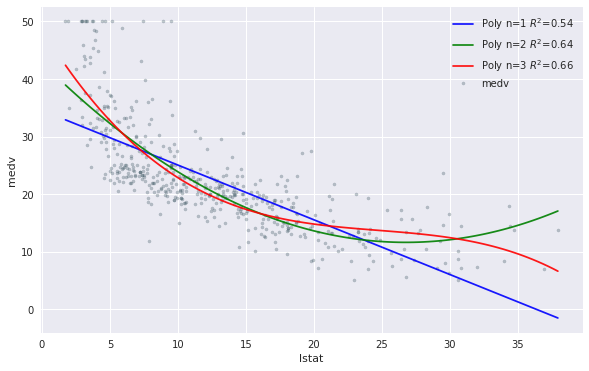

In [17]:

# plot lstat (% lower status of the population) against median value
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df.lstat, df.medv, s=10, alpha=0.3)
plt.xlabel('lstat')
plt.ylabel('medv')

# points linearlyd space on lstats
x = pd.DataFrame({'lstat': np.linspace(df.lstat.min(), df.lstat.max(), 100)})

# 1-st order polynomial
poly_1 = smf.ols(formula='medv ~ 1 + lstat', data=df).fit()
plt.plot(x.lstat, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, 
         alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='medv ~ 1 + lstat + I(lstat ** 2.0)', data=df).fit()
plt.plot(x.lstat, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='medv ~ 1 + lstat + I(lstat ** 2.0) + I(lstat ** 3.0)', data=df).fit()
plt.plot(x.lstat, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()



## Regression Diagnostics

 When performing regression, we need to verify that our data meet the regression assumptions, or else the results might be misleading.
 Aspects to consider:
 * **Linearity**: the relationships between the predictors and the outcome variable should be linear.
 * **Normality**: the errors should be normally distributed - technically normality is necessary only for the t-tests to be valid, estimation of the coefficients only requires that the errors be identically and independently distributed. (test for normality of residuals)
 * **Homogeneity of variance (homoscedasticity)**: the error variance should be constant (Test for Heteroscedasticity)
 * **Independence**: the errors associated with one observation are not correlated with the errors of any other observation.
 * **Errors in variables**: predictor variables are measured without error 
 * **Model specification**: the model should be properly specified (including all relevant variables, and excluding irrelevant variables).
 
 Additionally, there are issues that may arise during the analysis that, although, are not assumptions of regression, may none the less, influence the resulting model.#
 *  **Influence**: individual observations that exert undue influence on the coefficients
 *   **Collinearity**: predictors that are highly collinear, i.e. linearly related, can cause problems in estimating the regression coefficients.



## Unusual and influential data

A single observation (or small group of observations) that is substantially different from all other observations may make a large difference in the results of the regression analysis.
There are three ways that an observation may be unusual:

* **Outliers**: an observation with large residual. An observation whose dependent-variable value is unusual given its values on the predictor variables. An outlier may indicate a sample peculiarity or data entry error.

* **Leverage**: An observation with an extreme value on a predictor variable is called a point with high leverage. Leverage is a measure of how far an observation deviates from the mean of that variable. These leverage points can have an effect on the estimate of regression coefficients.

* **Influence**: An observation is said to be influential if removing the observation substantially changes the estimate of coefficients. Influence may be thought of as the product of the above to points.

![title](outl2.png)


Let's observe the above notions wiht an example. In the "crime" dataset the variables are state id (sid), state name (state), violent crimes per 100,000 people (crime), murders per 1,000,000 (murder), the percent of the population living in metropolitan areas (pctmetro), the percent of the population that is white (pctwhite), percent of population with a high school education or above (pcths), percent of population living under poverty line (poverty), and percent of population that are single parents (single). 

In [48]:
url = "http://www.ats.ucla.edu/stat/data/crime.csv"

with requests.Session() as s:
    download = s.get(url)
    decoded_content = download.content.decode('utf-8')
 
data_iter = csv.reader(decoded_content.splitlines(), delimiter=',')
data = [data for data in data_iter]
#print(data) 
crime = pd.DataFrame(data[1:]) #skip first line with the titles
crime.columns = data[0] #first line of CSV has col names
print(crime)
print(crime.head())

   sid state crime murder pctmetro pctwhite pcths poverty single
0    1    ak   761      9     41.8     75.2  86.6     9.1   14.3
1    2    al   780   11.6     67.4     73.5  66.9    17.4   11.5
2    3    ar   593   10.2     44.7     82.9  66.3      20   10.7
3    4    az   715    8.6     84.7     88.6  78.7    15.4   12.1
4    5    ca  1078   13.1     96.7     79.3  76.2    18.2   12.5
5    6    co   567    5.8     81.8     92.5  84.4     9.9   12.1
6    7    ct   456    6.3     95.7       89  79.2     8.5   10.1
7    8    de   686      5     82.7     79.4  77.5    10.2   11.4
8    9    fl  1206    8.9       93     83.5  74.4    17.8   10.6
9   10    ga   723   11.4     67.7     70.8  70.9    13.5     13
10  11    hi   261    3.8     74.7     40.9  80.1       8    9.1
11  12    ia   326    2.3     43.8     96.6  80.1    10.3      9
12  13    id   282    2.9       30     96.7  79.7    13.1    9.5
13  14    il   960   11.4       84       81  76.2    13.6   11.5
14  15    in   489    7.5

In [44]:
crime.describe()

,sid,state,crime,murder,pctmetro,pctwhite,pcths,poverty,single
count,51,51,51,51,51,51,51,51,51
unique,51,51,50,44,45,49,46,40,36
top,19,ny,208,3.9,100,75.2,76.7,10.7,10.8
freq,1,1,2,3,2,2,2,3,4


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


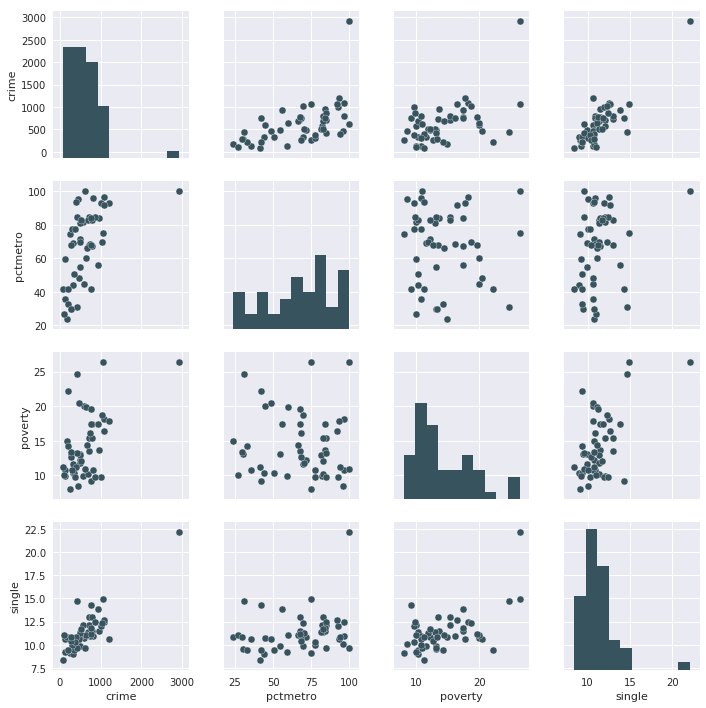

In [65]:
crime[['crime', 'pctmetro', 'poverty',  'single']] = crime[['crime', 'pctmetro', 'poverty',  'single']].astype(float)
sns.pairplot(crime[['crime', 'pctmetro', 'poverty',  'single']].dropna(how = 'any', axis = 0))

 In every plot, we see a data point that is far away from the rest of the data points. We can make individual graphs of crime with pctmetro and poverty and single so we can get a better view of these scatterplots. We will annotate also the points with state names.
 

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


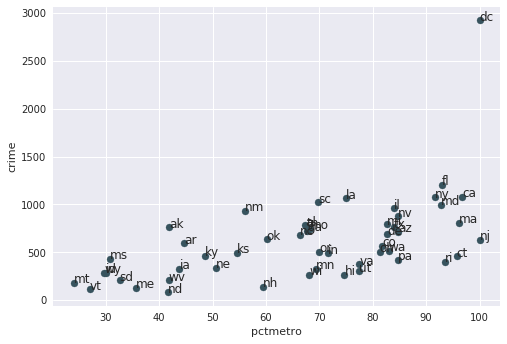

In [66]:
plt.scatter(crime.pctmetro, crime.crime)

for i, state in enumerate(crime.state):
    plt.annotate(state, [crime.pctmetro[i], crime.crime[i]])

plt.xlabel("pctmetro")
plt.ylabel("crime")

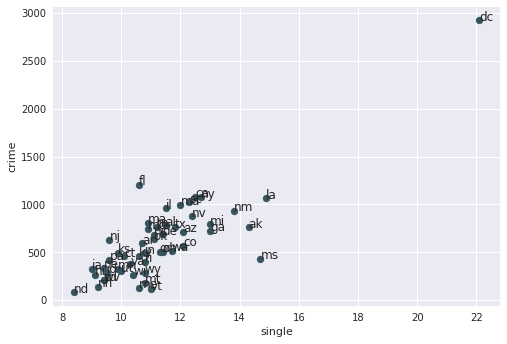

In [69]:
plt.scatter(crime.single, crime.crime)

for i, state in enumerate(crime.state):
    plt.annotate(state, [crime.single[i], crime.crime[i]])

plt.xlabel("single")
plt.ylabel("crime")

In [71]:
lm = smf.ols(formula = "crime ~ pctmetro + poverty + single", data = crime).fit()
print(lm.summary())

influence = lm.get_influence()
#resid_student = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     82.16
Date:                Wed, 10 May 2017   Prob (F-statistic):           1.03e-18
Time:                        08:59:05   Log-Likelihood:                -335.71
No. Observations:                  51   AIC:                             679.4
Df Residuals:                      47   BIC:                             687.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1666.4359    147.852    -11.271      0.0

To identify all the potentially unusual or influential pointswe will output several statistics that we will need for the next few analyses to a dataset called crime1res, and we will explain each statistic in turn. These statistics include the 
* **studentized residual** (* resid_student*): quotient resulting from the division of a residual by an estimate of its standard deviation
* **leverage** (*leverage*): measure of how far away the independent variable values of an observation are from those of the other observations. The leverage score of the $i$-th data unit is $h_i = [H]_{ii}$, where $H=X\left(X^T X \right)^{-1}X^T$ is the **hat or projection matrix **.
* **Cook's Distance** (*cooks*) $D_i = \frac{e^2_i}{s^2 p}\left[ \frac{h_i}{(1-h_i)^2} \right]$, where $s^2$ is the mean squared error of the regression model.
* **DFBETA** = $\boldsymbol{\beta} - \boldsymbol{\beta_{(i)}}$, where $\boldsymbol{\beta_{(i)}}$ is the coefficient evaluated with the $i$th row of $X$ omitted.



In [73]:
influence = lm.get_influence()
resid_student = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
#(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

crime1res = pd.concat([pd.Series(cooks, name = "cooks"),  pd.Series(leverage, name = "leverage"), pd.Series(resid_student, name = "resid_student")], axis = 1)
crime1res = pd.concat([crime, crime1res], axis = 1)
crime1res.head() 



,sid,state,crime,murder,pctmetro,pctwhite,pcths,poverty,single,cooks,leverage,resid_student
0,1,ak,761.0,9,41.8,75.2,86.6,9.1,14.3,0.007565,0.260676,0.290081
1,2,al,780.0,11.6,67.4,73.5,66.9,17.4,11.5,0.002020,0.032089,0.489712
2,3,ar,593.0,10.2,44.7,82.9,66.3,20.0,10.7,0.014897,0.085385,0.795809
3,4,az,715.0,8.6,84.7,88.6,78.7,15.4,12.1,0.006654,0.033806,-0.869915
4,5,ca,1078.0,13.1,96.7,79.3,76.2,18.2,12.5,0.000075,0.076468,0.059353


Let's examine the studentized residuals as a first means for identifying outliers. We requested the studentized residuals in the above regression in the output statement and named them r. Studentized residuals are a type of standardized residual that can be used to identify outliers. 

In [76]:
r = crime1res.resid_student
print( '-'*30 + ' studentized residual ' + '-'*30)
print( r.describe())
print( '\n')

r_sort = crime1res.sort_values(by = 'resid_student')
print ('-'*30 + ' top 5 most negative residuals ' + '-'*30)
print( r_sort.head())
print ('\n')

print ('-'*30 + ' top 5 most positive residuals ' + '-'*30)
print (r_sort.tail())

------------------------------ studentized residual ------------------------------
count    51.000000
mean      0.018402
std       1.133126
min      -3.570789
25%      -0.555460
50%       0.052616
75%       0.599771
max       3.765847
Name: resid_student, dtype: float64


------------------------------ top 5 most negative residuals ------------------------------
   sid state   crime murder  pctmetro pctwhite pcths  poverty  single  \
24  25    ms   434.0   13.5      30.7     63.3  64.3     24.7    14.7   
17  18    la  1062.0   20.3      75.0     66.7  68.3     26.4    14.9   
38  39    ri   402.0    3.9      93.6     92.6    72     11.2    10.8   
46  47    wa   515.0    5.2      83.0     89.4  83.8     12.1    11.7   
34  35    oh   504.0      6      81.3     87.5  75.7     13.0    11.4   

       cooks  leverage  resid_student  
24  0.602106  0.191012      -3.570789  
17  0.159264  0.165277      -1.838578  
38  0.041165  0.056803      -1.685598  
46  0.015271  0.035181      -1.30391

We observe that there are 3 states with large residuals, but we may also programatically request the entries with extreme residual values

In [79]:
print( crime[abs(r) > 2])

   sid state   crime murder  pctmetro pctwhite pcths  poverty  single
8    9    fl  1206.0    8.9      93.0     83.5  74.4     17.8    10.6
24  25    ms   434.0   13.5      30.7     63.3  64.3     24.7    14.7
50  51    dc  2922.0   78.5     100.0     31.8  73.1     26.4    22.1


Let's look at the leverage's to identify observations that will have potential great influence on regression coefficient estimates. 

Generally, a point with leverage greater than $\frac{(2k+2)}{n}$ should be carefully examined, where $k$ is the number of predictors and $n$ is the number of observations.

In [80]:
leverage = crime1res.leverage
print ('-'*30 + ' Leverage ' + '-'*30)
print (leverage.describe())
print ('\n')

leverage_sort = crime1res.sort_values(by = 'leverage', ascending = False)

print ('-'*30 + ' top 5 highest leverage data points ' + '-'*30)
print (leverage_sort.head())

------------------------------ Leverage ------------------------------
count    51.000000
mean      0.078431
std       0.080285
min       0.020061
25%       0.037944
50%       0.061847
75%       0.083896
max       0.536383
Name: leverage, dtype: float64


------------------------------ top 5 highest leverage data points ------------------------------
   sid state   crime murder  pctmetro pctwhite pcths  poverty  single  \
50  51    dc  2922.0   78.5     100.0     31.8  73.1     26.4    22.1   
0    1    ak   761.0      9      41.8     75.2  86.6      9.1    14.3   
24  25    ms   434.0   13.5      30.7     63.3  64.3     24.7    14.7   
48  49    wv   208.0    6.9      41.8     96.3    66     22.2     9.4   
17  18    la  1062.0   20.3      75.0     66.7  68.3     26.4    14.9   

       cooks  leverage  resid_student  
50  3.203429  0.536383       3.765847  
0   0.007565  0.260676       0.290081  
24  0.602106  0.191012      -3.570789  
48  0.016361  0.180200      -0.541535  
17  0.15

In [83]:
print( crime1res[leverage > (2*3+2)/50.])

   sid state   crime murder  pctmetro pctwhite pcths  poverty  single  \
0    1    ak   761.0      9      41.8     75.2  86.6      9.1    14.3   
17  18    la  1062.0   20.3      75.0     66.7  68.3     26.4    14.9   
24  25    ms   434.0   13.5      30.7     63.3  64.3     24.7    14.7   
48  49    wv   208.0    6.9      41.8     96.3    66     22.2     9.4   
50  51    dc  2922.0   78.5     100.0     31.8  73.1     26.4    22.1   

       cooks  leverage  resid_student  
0   0.007565  0.260676       0.290081  
17  0.159264  0.165277      -1.838578  
24  0.602106  0.191012      -3.570789  
48  0.016361  0.180200      -0.541535  
50  3.203429  0.536383       3.765847  


DC observation has both large leverage and residuals.
We can make a plot that shows the leverage by the residual squared and look for observations that are jointly high on both of these measures. 
(**leverage versus residual-squared plot**)



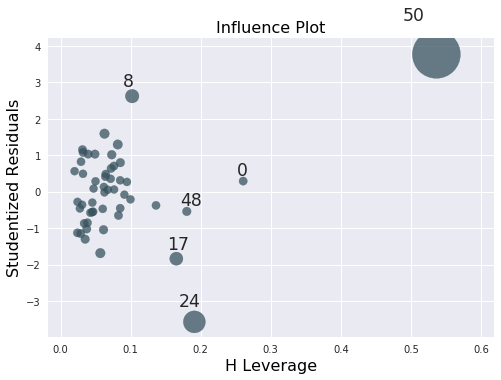

In [99]:
from statsmodels.graphics.regressionplots import *
influence_plot(lm)
plt.show()

The lowest value that Cook's Distance can assume is zero, and the higher the Cook's Distance is, the more influential the point is. The conventional cut-off point is $4/n$.

In [86]:
print( crime1res[cooks > (4)/50.])

   sid state   crime murder  pctmetro pctwhite pcths  poverty  single  \
8    9    fl  1206.0    8.9      93.0     83.5  74.4     17.8    10.6   
17  18    la  1062.0   20.3      75.0     66.7  68.3     26.4    14.9   
24  25    ms   434.0   13.5      30.7     63.3  64.3     24.7    14.7   
50  51    dc  2922.0   78.5     100.0     31.8  73.1     26.4    22.1   

       cooks  leverage  resid_student  
8   0.173629  0.102202       2.619523  
17  0.159264  0.165277      -1.838578  
24  0.602106  0.191012      -3.570789  
50  3.203429  0.536383       3.765847  


In [89]:
crimedfbeta = pd.concat([crime1res, pd.DataFrame(influence.dfbetas, columns = ['dfb_intercept', 'dfb_pctmetro', 'dfb_poverty', 'dfb_single'])], axis = 1)
print( crimedfbeta.head())

  sid state   crime murder  pctmetro pctwhite pcths  poverty  single  \
0   1    ak   761.0      9      41.8     75.2  86.6      9.1    14.3   
1   2    al   780.0   11.6      67.4     73.5  66.9     17.4    11.5   
2   3    ar   593.0   10.2      44.7     82.9  66.3     20.0    10.7   
3   4    az   715.0    8.6      84.7     88.6  78.7     15.4    12.1   
4   5    ca  1078.0   13.1      96.7     79.3  76.2     18.2    12.5   

      cooks  leverage  resid_student  dfb_intercept  dfb_pctmetro  \
0  0.007565  0.260676       0.290081      -0.015624     -0.106185   
1  0.002020  0.032089       0.489712       0.000577      0.012429   
2  0.014897  0.085385       0.795809       0.067038     -0.068748   
3  0.006654  0.033806      -0.869915       0.052022     -0.094761   
4  0.000075  0.076468       0.059353      -0.007311      0.012640   

   dfb_poverty  dfb_single  
0    -0.131340    0.145183  
1     0.055285   -0.027513  
2     0.175348   -0.105263  
3    -0.030883    0.001242  
4     0

The value for DFB_single for Alaska is 0.14, which means that by being included in the analysis (as compared to being excluded), Alaska increases the coefficient for single by 0.14 standard errors, i.e., 0.14 times the standard error for BSingle or by (0.14 * 15.5).
In general absolute values of DFBETA larger than $ \frac{2}{sqrt(n) }$ require further investigation.

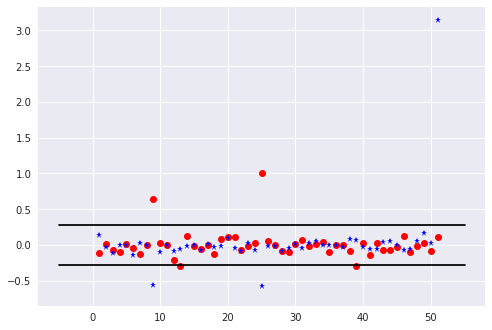

In [97]:
plt.plot(crimedfbeta.sid, crimedfbeta.dfb_pctmetro,color='r',  marker = "o",linestyle = 'None')
plt.plot(crimedfbeta.sid, crimedfbeta.dfb_poverty, color='g', marker = "+",linestyle = 'None')
plt.plot(crimedfbeta.sid, crimedfbeta.dfb_single,color='b',  marker = "*",linestyle = 'None')

# add a horizontial line in pyplot, using plt.plot((x1, x2), (y1, y2), 'c-')
plt.plot((-5, 55), (0.28, 0.28), 'k-')
plt.plot((-5, 55), (-0.28, -0.28), 'k-')

Since the datapoint "dc" is the most problematic for our analysis, let's run the regression without the 'dc' point.

In [78]:
lm_1 = smf.ols(formula = "crime ~ pctmetro + poverty + single", data = crime[crime.state != "dc"]).fit()
print( lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     39.90
Date:                Wed, 10 May 2017   Prob (F-statistic):           7.45e-13
Time:                        09:30:28   Log-Likelihood:                -322.90
No. Observations:                  50   AIC:                             653.8
Df Residuals:                      46   BIC:                             661.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1197.5381    180.487     -6.635      0.0

## Excersises:

- #### Advertisement budget vs sales:
 * For the advertising dataset, perform multivariable regression by considering also the Newspaper budget as a regressor.
 * Identify the subset of the regressors that best explain the outcome.

- #### Swiss Fertility and Socioeconomic Indicators dataset:
 * Dowload the swiss fertility dataset from "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/datasets/swiss.csv"
 * Create a pandas dataframe and inspect the elements
 * Explained the measured fertility using simpke linear regression of each prectictor seperatelly
 * Asses the goodness of fit of each obtained model with residual plots and $R^2$.
 * Perform a pultiple linear regression considering all the regressors together.
 * Compare the coefficients obtained from the simple linear regressions with those obtained from the multivariable one. Do they remain the same?
 * Create an additional column in your dataframe with the sum of the 'Agriculture' and 'Education' columns. Perform linear multiple linear regression again considering also this additional variable.
- To better understand the results of the previous excersise, perform multiple regression on the following contrived set of variables:
 * Try to explain y by considering only x1 as predictor.
 * Consider both x1 and x2 as predictors for the outcome y.
 * Do you observe anything unusual?

In [35]:
from scipy import stats

In [36]:
n = 100
x2 = np.arange(0,n)
x1 = 0.01 * x2 * np.random.uniform(low=-.10, high=.10, size=n)
distribution = stats.norm(loc=0,scale=0.01)
y = -x1 + x2 +  distribution.rvs(size=n)


- The file **"sales_1_data_yw1w16.txt"** contains data for the outcome y in the first column and 16 predictors in the successive columns. 
 * Load the data into a data frame.
 * Perform multiple linear regression considering all the regressors.
 * Visualise the residual plot to determine the goodness of fit.
 * Identify the subset of the predictors that explain the outcome y.
 * Did you find anything abnormal?
 
 
- **Non-linear regression**
 - Open the "nations.sav" file (hint:scipy.io.readsav()) that has data about a number of nations around the world and load it into a pandas dataframe.
 - Examine the relationship of the entries GNP per capita (gnpcap) and births (birth) by means of a linear regression.
  - Determine the goodness of fit. Are the two variables linerly related?
  - Identify a non-linear transformation of the gnpcap variable that would result in a better fit.

## The iris dataset
- Load the iris dataset from sklearn library

<space> <space> <space> hint: from sklearn import datasets , iris = datasets.load_iris()
- Visualise the dataset with "pairplot" from seaborn library.
- Sepal and petal size tend to be related: bigger flowers are just bigger! But is there in addition a systematic effect of species? Perform multiple regression with predictors "name" and "petal length".